This project analyzes a comprehensive dataset on US Natural Resources from 2003 to 2023. The data covers production volumes, revenue generation, and management of resources on federal and Native American lands. By examining this 20-year period, we aim to uncover trends in resource utilization, economic impacts, and shifts in the US energy landscape, potentially informing future policy decisions.

## Set Up the Environment and Importing the Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Initial Data Exploration

Examine the structure and content of the dataset.

In [5]:
# Load the data
df = pd.read_csv('calendar_year_revenue.csv')

# Show the first few rows
df.head()


,Calendar Year,Land Class,Land Category,State,County,FIPS Code,Offshore Region,Revenue Type,Mineral Lease Type,Commodity,Product,Revenue
0,2003,Federal,Onshore,Pennsylvania,Armstrong,42005.0,NaN,Royalties,Oil & Gas,Gas,Unprocessed (Wet) Gas,341.47
1,2003,Federal,Onshore,Louisiana,Natchitoches,22069.0,NaN,Other revenues,Oil & Gas,Oil & gas (pre-production),NaN,331.30
2,2003,Federal,Onshore,Missouri,Iron,29093.0,NaN,Royalties,Hardrock,Copper,Copper Concentrate,57929.02
3,2003,Federal,Onshore,Missouri,Iron,29093.0,NaN,Rents,Hardrock,Hardrock,NaN,-51533.57
4,2003,Federal,Onshore,Missouri,Iron,29093.0,NaN,Royalties,Hardrock,Hardrock,Copper Concentrate,14834.41


In [6]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48413 entries, 0 to 48412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calendar Year       48413 non-null  int64  
 1   Land Class          48413 non-null  object 
 2   Land Category       48413 non-null  object 
 3   State               46458 non-null  object 
 4   County              46458 non-null  object 
 5   FIPS Code           46458 non-null  float64
 6   Offshore Region     933 non-null    object 
 7   Revenue Type        48413 non-null  object 
 8   Mineral Lease Type  48326 non-null  object 
 9   Commodity           48413 non-null  object 
 10  Product             26254 non-null  object 
 11  Revenue             48413 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 4.4+ MB


In [7]:
# Get summary statistics
df.describe()

,Calendar Year,FIPS Code,Revenue
count,48413.000000,46458.000000,4.841300e+04
mean,2012.986739,31707.041629,5.163763e+06
std,5.978945,16383.981895,9.552400e+07
min,2003.000000,1003.000000,-2.117147e+08
25%,2008.000000,21013.000000,5.620000e+02
50%,2013.000000,35005.000000,9.911290e+03
75%,2018.000000,48121.000000,1.200011e+05
max,2023.000000,56045.000000,6.495946e+09


In [8]:
# Check for missing values
df.isnull().sum()

Calendar Year             0
Land Class                0
Land Category             0
State                  1955
County                 1955
FIPS Code              1955
Offshore Region       47480
Revenue Type              0
Mineral Lease Type       87
Commodity                 0
Product               22159
Revenue                   0
dtype: int64

### Data Cleaning 

Handle missing values and data type issues.

In [10]:
# Handle missing values (for simplicity, we'll drop rows with missing revenue values as they are important for our analysis project)
df = df.dropna(subset=['Revenue'])


### Visualization

In [12]:
# Group data by year and sum up the revenue for each year
df['Revenue'] = pd.to_numeric(df['Revenue'], errors = 'coerce')

revenue_by_year = df.groupby('Calendar Year')['Revenue'].sum().reset_index()


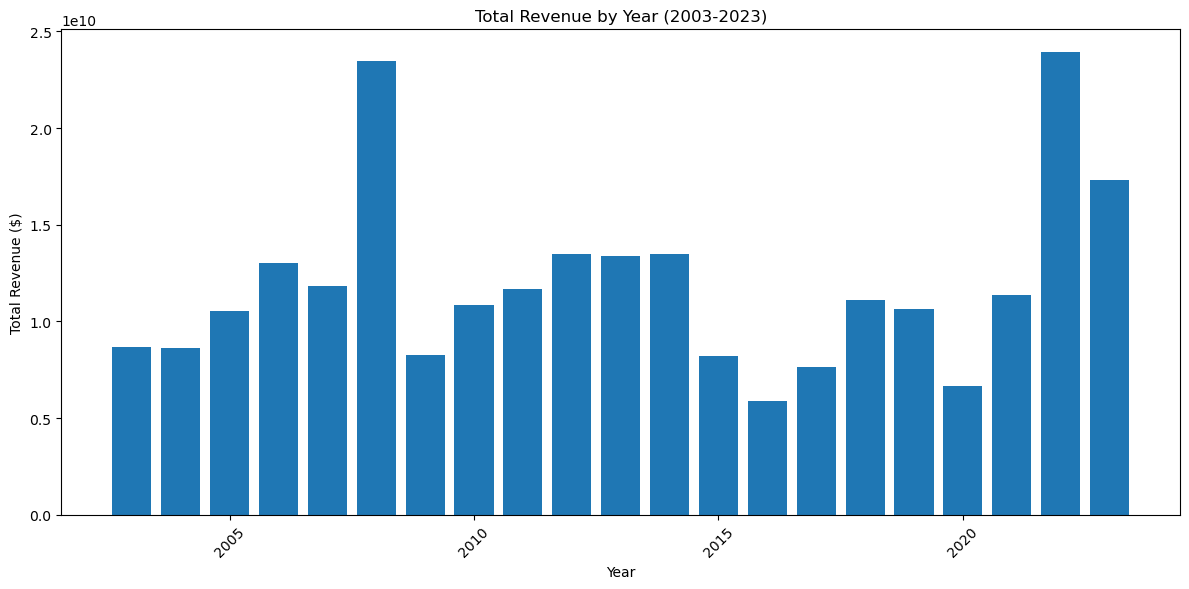

In [13]:
# Plot total revenue by year
plt.figure(figsize=(12, 6))
plt.bar(revenue_by_year['Calendar Year'], revenue_by_year['Revenue'])
plt.title('Total Revenue by Year (2003-2023)')
plt.xlabel('Year')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

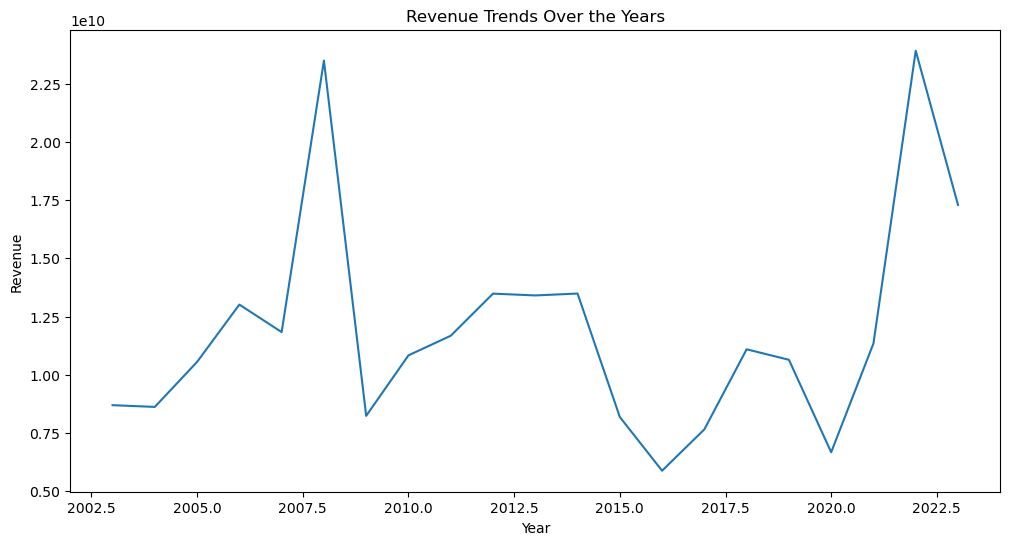

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_by_year, x='Calendar Year', y='Revenue', errorbar=None)
plt.title('Revenue Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

In [15]:
# Group data by state and revenue type, summing up the revenue for each combination
revenue_by_state_type = df.groupby(['State', 'Revenue Type'])['Revenue'].sum().unstack().fillna(0)



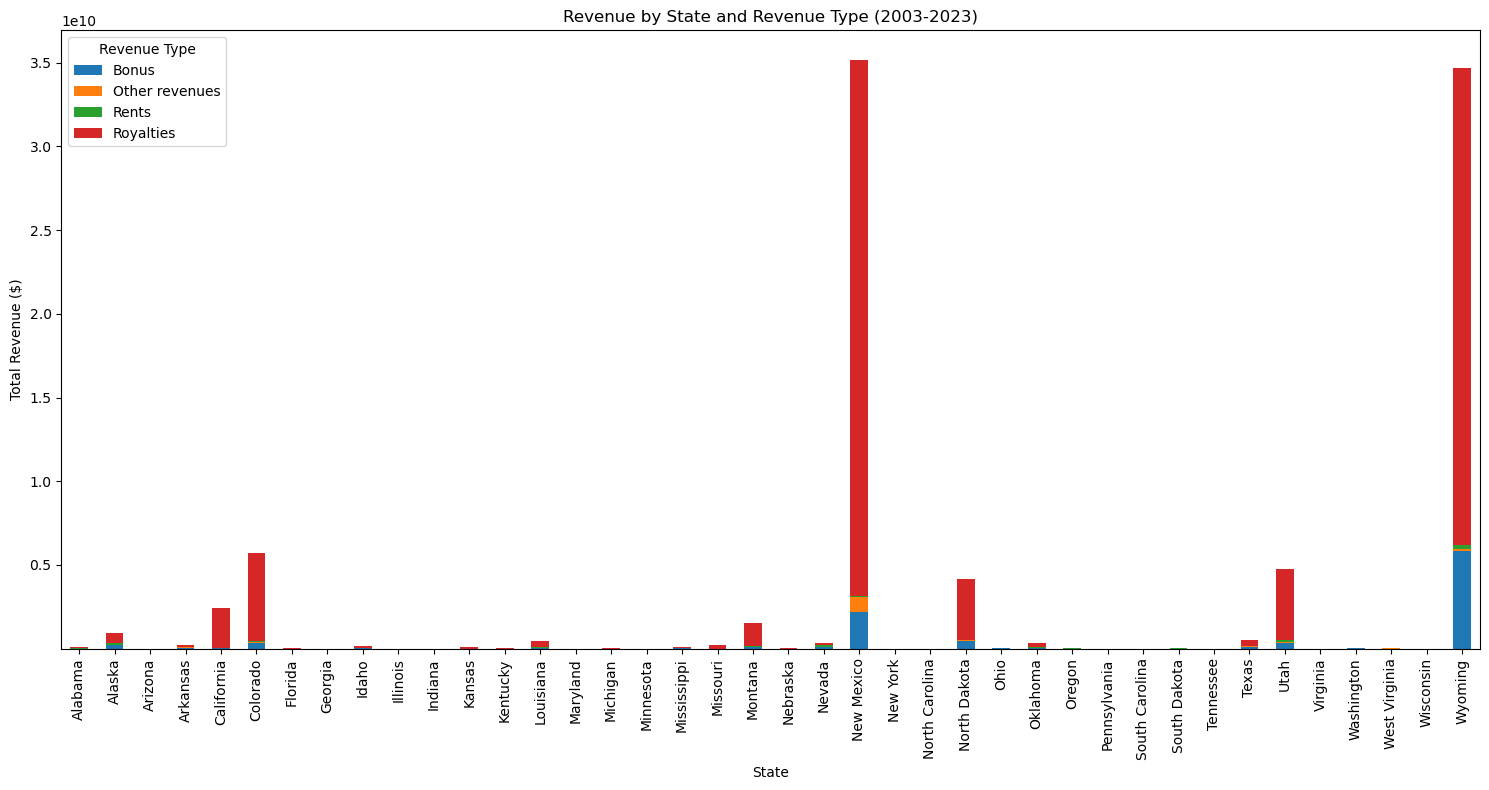

In [16]:
# Plot revenue by state and revenue type
revenue_by_state_type.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Revenue by State and Revenue Type (2003-2023)')
plt.xlabel('State')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
# Group by Land Class and sum the Revenue
revenue_by_land_class = df.groupby('Land Class')['Revenue'].sum().sort_values(ascending=False)

print(revenue_by_land_class)


Land Class
Federal            2.335175e+11
Native American    1.647572e+10
Name: Revenue, dtype: float64


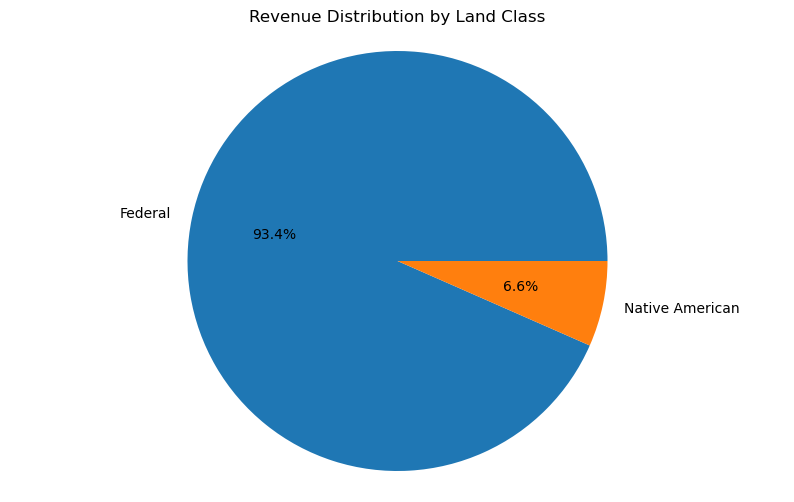

In [18]:
# Plot revenue by land class
plt.figure(figsize=(10, 6))
plt.pie(revenue_by_land_class, labels=revenue_by_land_class.index, autopct='%1.1f%%')
plt.title('Revenue Distribution by Land Class')
plt.axis('equal')
plt.show()

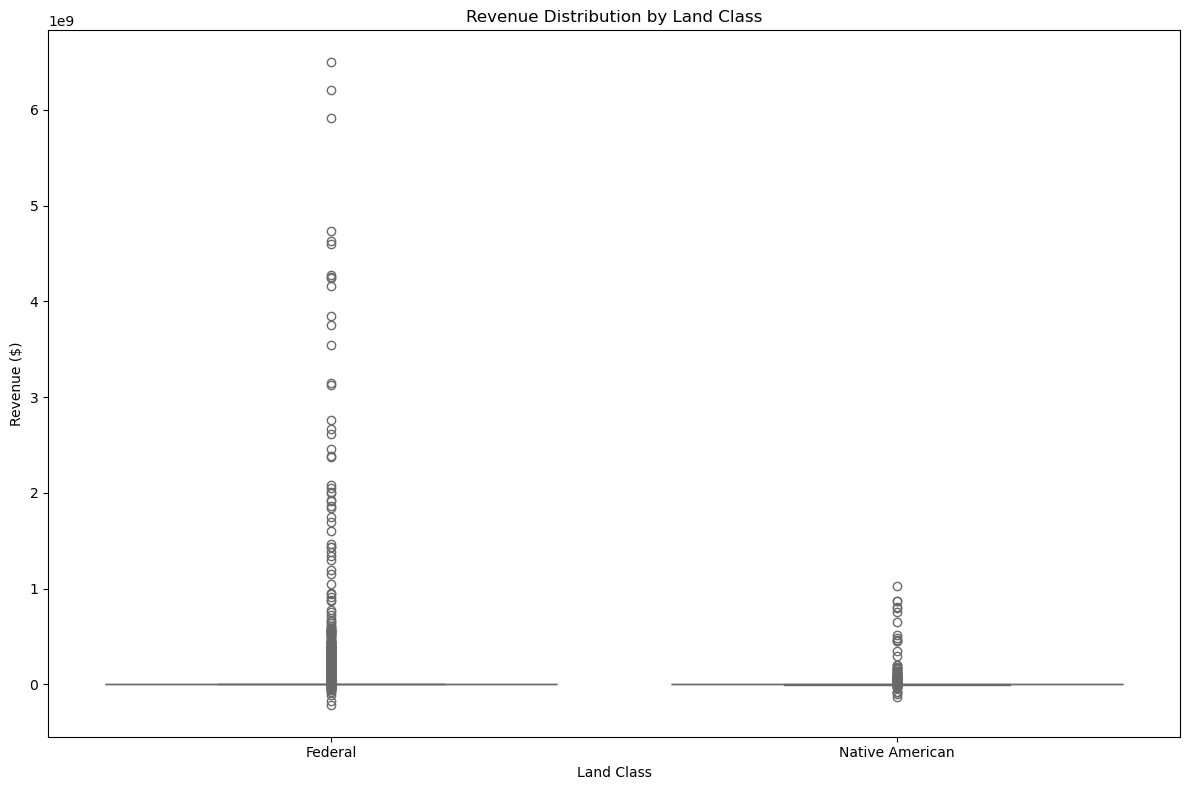

In [19]:
# Set the color palette
sns.set_palette("Set3")

# Create the box plot for revenue by land class
plt.figure(figsize=(12, 8))
sns.boxplot(x='Land Class', y='Revenue', data=df)

plt.title('Revenue Distribution by Land Class')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()

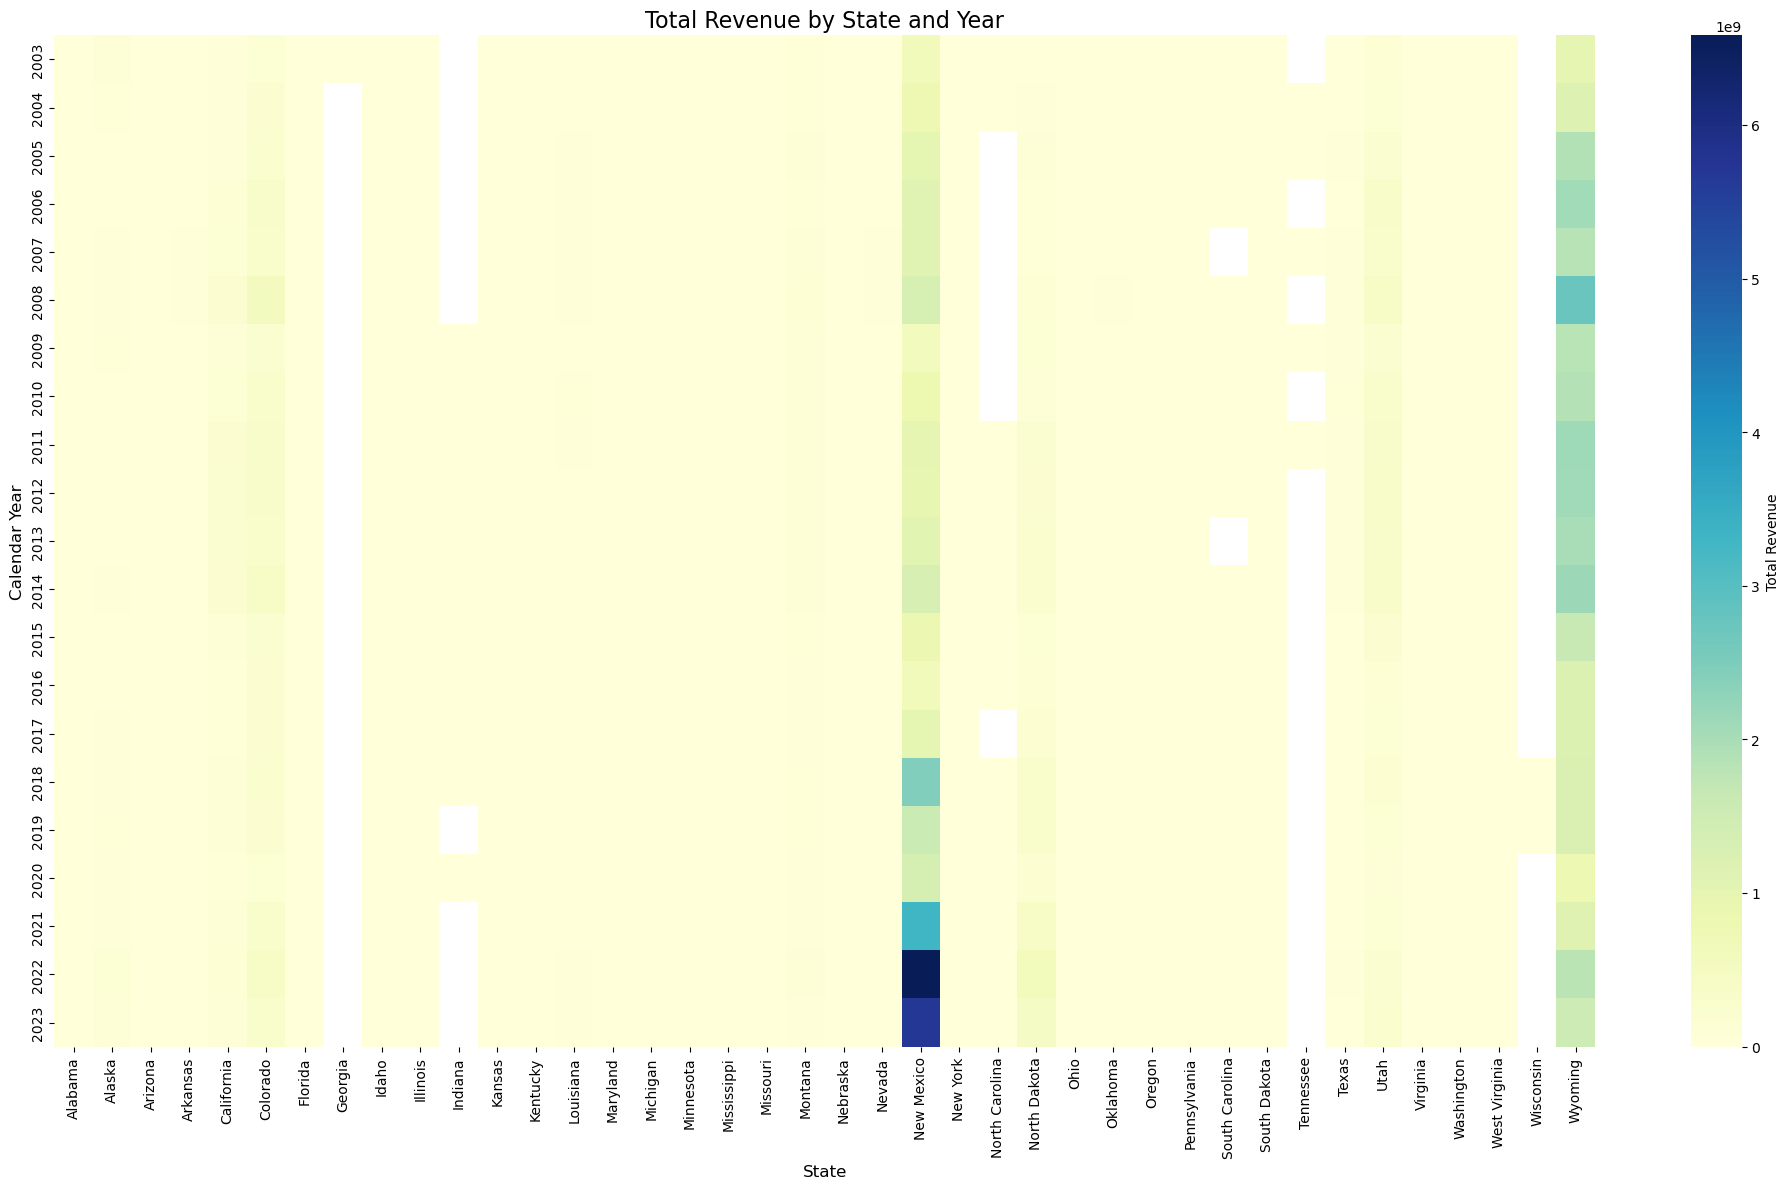

In [20]:
# Group by Calendar Year and State, summing the Revenue
heatmap_data = df.groupby(['Calendar Year', 'State'])['Revenue'].sum().unstack()

# Create the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, fmt=".0f", cbar_kws={'label': 'Total Revenue'})

plt.title('Total Revenue by State and Year', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Calendar Year', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [21]:
top_10_states = df.groupby('State')['Revenue'].sum().nlargest(10).index
heatmap_data_top_10 = df[df['State'].isin(top_10_states)].groupby(['Calendar Year', 'State'])['Revenue'].sum().unstack()


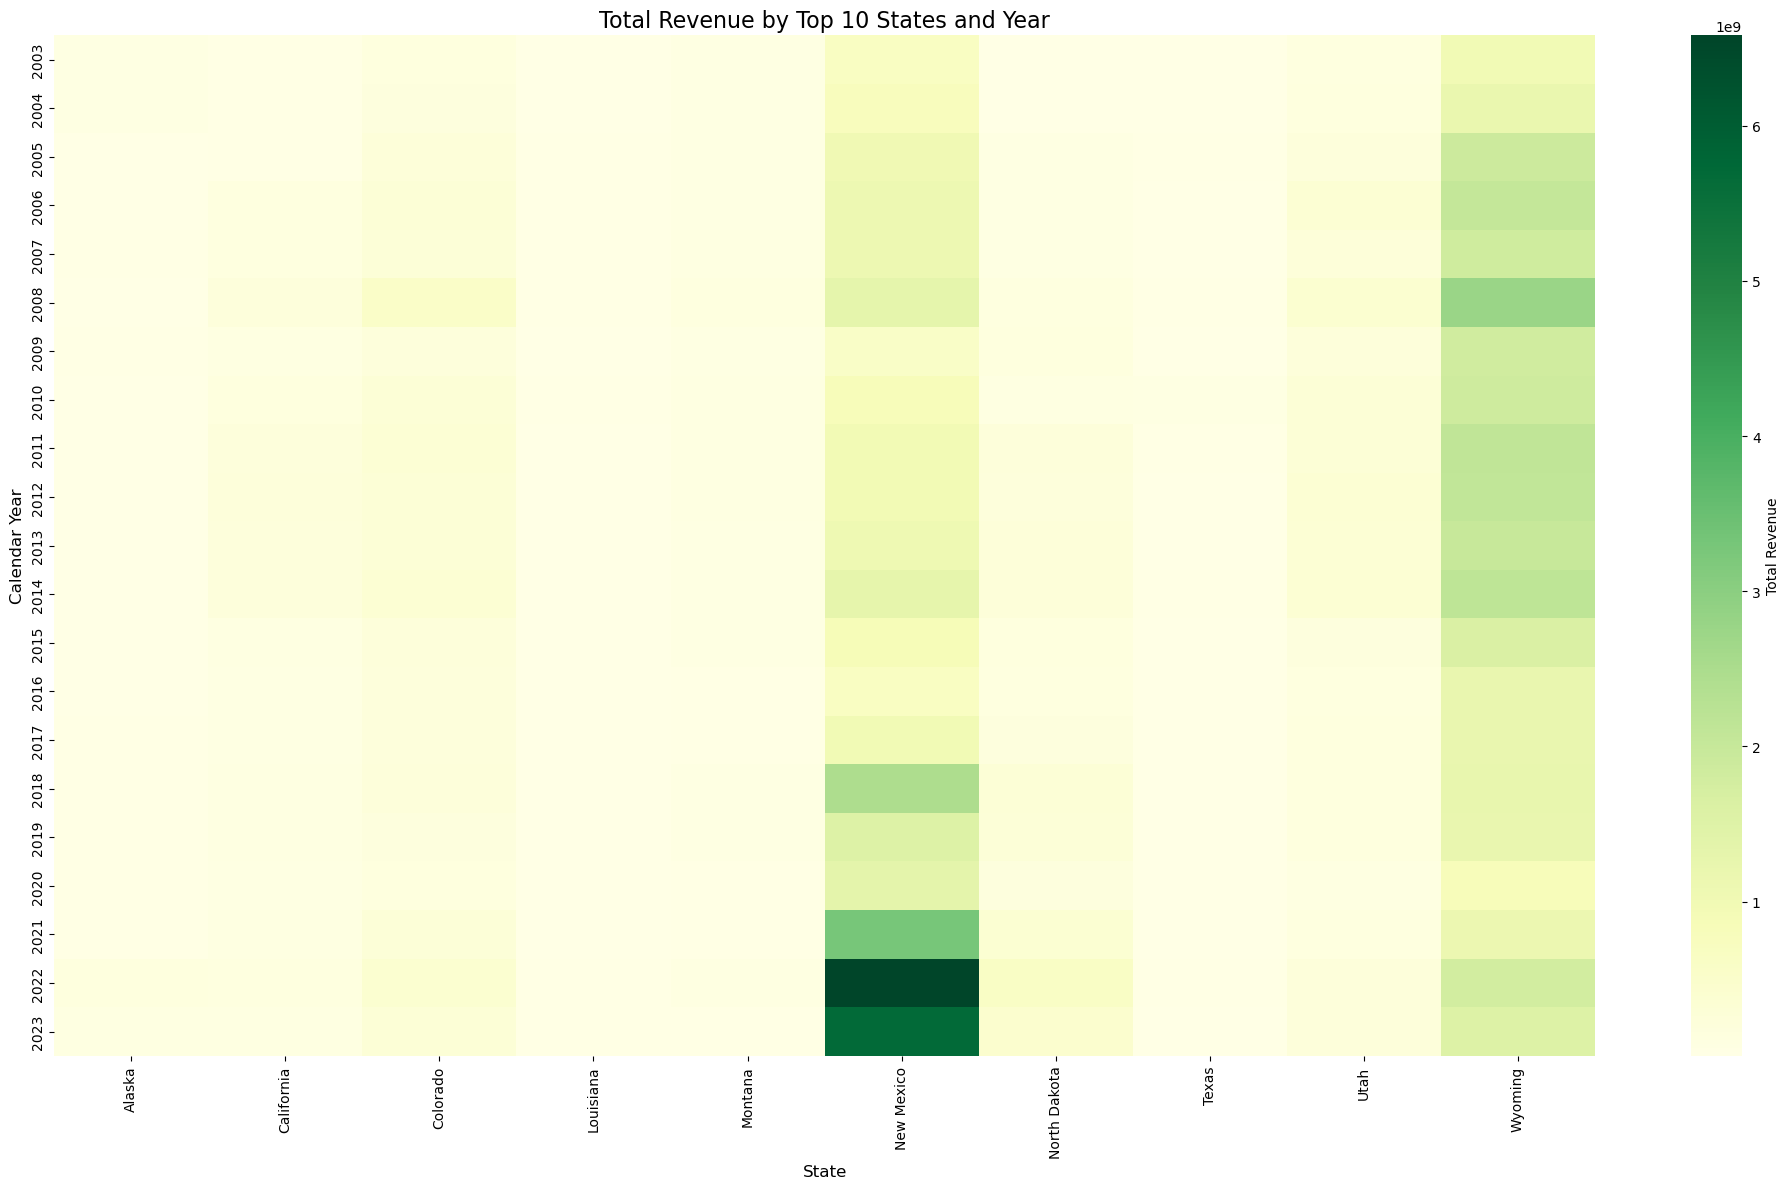

In [22]:
# Create the heatmap for top 10 states by revenue 
plt.figure(figsize=(20, 12))
sns.heatmap(heatmap_data_top_10, cmap="YlGn", annot=False, fmt=".0f", cbar_kws={'label': 'Total Revenue'})

plt.title('Total Revenue by Top 10 States and Year', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Calendar Year', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

These visualizations provide insights into how natural resource revenues have evolved over time and across different states and different land classes.

### Data Pre-processing

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48413 entries, 0 to 48412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calendar Year       48413 non-null  int64  
 1   Land Class          48413 non-null  object 
 2   Land Category       48413 non-null  object 
 3   State               46458 non-null  object 
 4   County              46458 non-null  object 
 5   FIPS Code           46458 non-null  float64
 6   Offshore Region     933 non-null    object 
 7   Revenue Type        48413 non-null  object 
 8   Mineral Lease Type  48326 non-null  object 
 9   Commodity           48413 non-null  object 
 10  Product             26254 non-null  object 
 11  Revenue             48413 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 4.4+ MB


In [27]:
df.isnull().sum()

Calendar Year             0
Land Class                0
Land Category             0
State                  1955
County                 1955
FIPS Code              1955
Offshore Region       47480
Revenue Type              0
Mineral Lease Type       87
Commodity                 0
Product               22159
Revenue                   0
dtype: int64

In [28]:
# Get unique values in the 'Offshore Region' column
offshore_regions = df['Offshore Region'].unique()

print(offshore_regions)

[nan 'Gulf of Mexico' 'Alaska' 'Pacific' 'Atlantic']


We have a lot of null values in some columns, I want to drop some columns, if the amount of nulls is more than %50. 

In [30]:
null_percentages = df.isnull().mean() * 100

print("Percentage of null values in each column:")
print(null_percentages)

Percentage of null values in each column:
Calendar Year          0.000000
Land Class             0.000000
Land Category          0.000000
State                  4.038172
County                 4.038172
FIPS Code              4.038172
Offshore Region       98.072832
Revenue Type           0.000000
Mineral Lease Type     0.179704
Commodity              0.000000
Product               45.770764
Revenue                0.000000
dtype: float64


In [31]:
# Drop the column
df_cleaned = df.drop(columns='Offshore Region')

In [32]:
df_cleaned['Product'] = df_cleaned['Product'].fillna('Unknown')

In [33]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48413 entries, 0 to 48412
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calendar Year       48413 non-null  int64  
 1   Land Class          48413 non-null  object 
 2   Land Category       48413 non-null  object 
 3   State               46458 non-null  object 
 4   County              46458 non-null  object 
 5   FIPS Code           46458 non-null  float64
 6   Revenue Type        48413 non-null  object 
 7   Mineral Lease Type  48326 non-null  object 
 8   Commodity           48413 non-null  object 
 9   Product             48413 non-null  object 
 10  Revenue             48413 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 4.1+ MB


In [34]:
# Handle missing values
df_cleaned = df_cleaned.dropna()

In [35]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46458 entries, 0 to 48412
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calendar Year       46458 non-null  int64  
 1   Land Class          46458 non-null  object 
 2   Land Category       46458 non-null  object 
 3   State               46458 non-null  object 
 4   County              46458 non-null  object 
 5   FIPS Code           46458 non-null  float64
 6   Revenue Type        46458 non-null  object 
 7   Mineral Lease Type  46458 non-null  object 
 8   Commodity           46458 non-null  object 
 9   Product             46458 non-null  object 
 10  Revenue             46458 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 4.3+ MB


In [36]:
# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['Land Class', 'Land Category', 'State', 'County', 'Revenue Type', 'Mineral Lease Type', 'Commodity', 'Product']
for col in categorical_columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))

In [37]:
# Prepare features and target
X = df_cleaned.drop(['Revenue', 'Calendar Year', 'FIPS Code'], axis=1)
y = df_cleaned['Revenue Type']  # Assuming we want to predict Revenue Type

In [38]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training (Random Forest)

In [41]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       596
           1       1.00      1.00      1.00      1638
           2       1.00      1.00      1.00      2000
           3       1.00      1.00      1.00      5058

    accuracy                           1.00      9292
   macro avg       1.00      1.00      1.00      9292
weighted avg       1.00      1.00      1.00      9292



### Model Training (Logistic Regression)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Logistic Regression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)
lr_pred = lr_classifier.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

# Support Vector Machine
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# Gradient Boosting
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
gb_pred = gb_classifier.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))


Logistic Regression Accuracy: 1.0
SVM Accuracy: 1.0
Gradient Boosting Accuracy: 1.0


### Regression for Revenue Prediction

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for regression
X_reg = df_cleaned.drop(['Revenue', 'Calendar Year', 'FIPS Code'], axis=1)
y_reg = df_cleaned['Revenue']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train 
model_regressor = LinearRegression()
model_regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = model_regressor.predict(X_test_reg)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("R2 Score:", r2_score(y_test_reg, y_pred_reg))


Mean Squared Error: 713699384206833.2
R2 Score: 0.003463460944462815
